In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [26]:
# import packages
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [27]:
# simulate condition assignments

conds = ['1', '2', '3'] # possible outcomes
sims = 10000            # number of simulations
size = 600              # the sample size of each "study"

# store the outcomes
outcomes = []

In [28]:
# set a seed, if desired
np.random.seed(123)

In [29]:
# the function
for i in range(sims):
  dist = np.random.choice(conds, size=size, replace=True)
  outcomes.append(dist)

In [30]:
# make the distribution of everything an np.array
every_outcome = np.array(outcomes)

In [31]:
'''
# look at the distribution of a random outcome
outcome_counts = Counter(every_outcome[576])
print(outcome_counts)
'''

Counter({'1': 211, '3': 198, '2': 191})


In [32]:
# look at the head of every_outcome
every_outcome_df = pd.DataFrame(every_outcome)
every_outcome_df.head() # this is a DF now, so every row is a observartion
every_outcome_df.tail() # and we have 10,000 rows, so every row is one simulation

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
9995,1,3,3,2,1,3,2,3,3,1,...,1,3,2,2,3,3,3,2,2,3
9996,3,1,2,2,2,3,3,3,3,1,...,3,3,2,2,1,2,1,3,1,3
9997,1,2,2,2,1,2,2,1,2,3,...,3,3,1,1,3,3,1,2,1,1
9998,2,1,1,2,1,2,1,3,3,3,...,2,1,3,1,2,2,1,3,1,2
9999,1,3,1,1,3,2,1,3,2,1,...,3,2,3,3,1,2,2,1,2,1


In [33]:
# go from wide to long
every_outcome_long = pd.melt(every_outcome_df, var_name='Variable', value_name='Value')
print(every_outcome_long.head())

   Variable Value
0         0     3
1         0     2
2         0     1
3         0     2
4         0     2


In [34]:
len(every_outcome_long)

6000000

In [35]:
# do some renaming
every_outcome_long = every_outcome_long.rename(columns={
    'Variable': 'Simulation',
    'Value':'Condition'
})

In [41]:
# count occurances across all of the simulations
condition_counts = every_outcome_long.groupby('Condition')['Simulation'].count()
condition_distribution = condition_counts / len(every_outcome_long) * 100
print(condition_distribution) # across everything, you have effectively perfect random assignment
# but that doesn't mean that random assignment might "fail" :)

Condition
1    2000281
2    2000288
3    1999431
Name: Simulation, dtype: int64
Condition
1    33.338017
2    33.338133
3    33.323850
Name: Simulation, dtype: float64


In [46]:
# counting everything in each row
def count_distribution(row):
  counts = Counter(row)
  return counts

# apply the function we've created
row_distributions = every_outcome_df.apply(count_distribution, axis=1)
print(row_distributions) # this is too unruely to just print

0       {'3': 205, '2': 202, '1': 193}
1       {'2': 208, '3': 193, '1': 199}
2       {'1': 203, '2': 193, '3': 204}
3       {'2': 193, '3': 218, '1': 189}
4       {'2': 192, '1': 192, '3': 216}
                     ...              
9995    {'1': 209, '3': 204, '2': 187}
9996    {'3': 206, '1': 195, '2': 199}
9997    {'1': 203, '2': 196, '3': 201}
9998    {'2': 192, '1': 199, '3': 209}
9999    {'1': 166, '3': 222, '2': 212}
Length: 10000, dtype: object


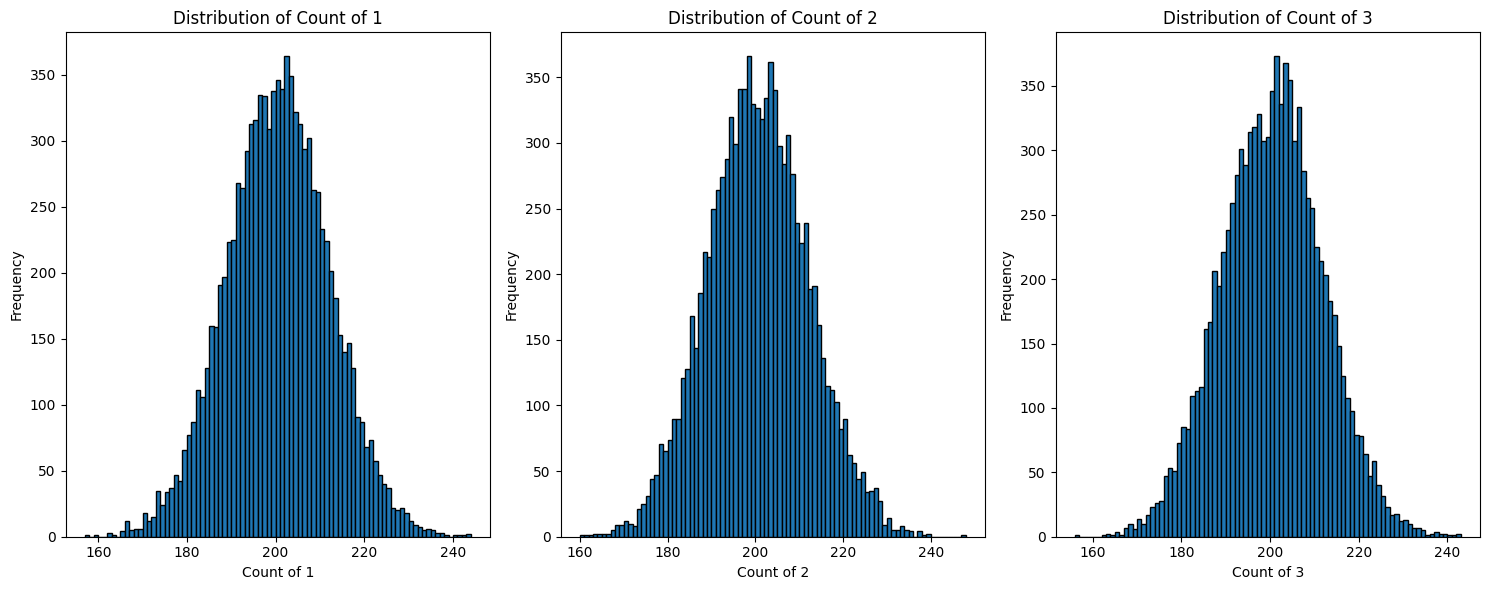

In [49]:
# first, get all of the counts
counts_1 = [dist.get('1', 0) for dist in row_distributions] # get the counts of 1, etc.
counts_2 = [dist.get('2', 0) for dist in row_distributions]
counts_3 = [dist.get('3', 0) for dist in row_distributions]

# size
plt.figure(figsize=(15, 6))

# each of the three subplots
plt.subplot(1, 3, 1)
plt.hist(counts_1, bins=range(min(counts_1), max(counts_1) + 2), edgecolor='black')
plt.xlabel('Count of 1')
plt.ylabel('Frequency')
plt.title('Distribution of Count of 1')

plt.subplot(1, 3, 2)
plt.hist(counts_2, bins=range(min(counts_2), max(counts_2) + 2), edgecolor='black')
plt.xlabel('Count of 2')
plt.ylabel('Frequency')
plt.title('Distribution of Count of 2')

plt.subplot(1, 3, 3)
plt.hist(counts_3, bins=range(min(counts_3), max(counts_3) + 2), edgecolor='black')
plt.xlabel('Count of 3')
plt.ylabel('Frequency')
plt.title('Distribution of Count of 3')

plt.tight_layout()
plt.show() # look perfectly normall distributed
# sometimes, random assignment does fail!

In [54]:
counts_2.sort() # this can be used to sort the counts in ascending order, for easier understanding

In [72]:
# now, the moment in which we can better understand how common rare numbers actually are
count_less_than = 0
for count in counts_1:
  if count < 170: # these determine what the actual less than value is (or equal to)
    count_less_than += 1
for count in counts_2:
  if count < 170:
    count_less_than += 1
for count in counts_3:
  if count < 170:
    count_less_than += 1

print("The number of times a number less than 160 appears in this simulation is:", count_less_than)
print("In other words,", ((count_less_than) / (10000))*100,"% of the time")

The number of times a number less than 160 appears in this simulation is: 106
In other words, 1.06 % of the time
